In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import input_file_name
from pyspark.sql.types import (IntegerType,
                               StringType, StructType, StructField)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import base64
from io import BytesIO

import requests
import bs4

from IPython.display import Image, display, HTML
HTML('''
<style>
.small-caps {
    font-variant: small-caps;
}
.custom-header {
        display: flex;
        justify-content: space-between;
        align-items: center;
        background: linear-gradient(to right, 
            #440154, #3B528B, #21918C, #5DC863);
        color: #FFF;
        padding: 0px 20px 5px;
        width: 100%;
        font-size: 18px;
        font-family: serif;
    }
</style>
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
def plot_to_html(alt_text):
    """Display the current figure as a centered html image

    Parameters
    ----------
    alt_text: str
        The alternative text for the image displayed
    """
    fig = plt.gcf()
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    fig = base64.b64encode(buf.getvalue()).decode('utf-8')
    html = f'''<div style="text-align: center;">
                   <img src="data:image/png;base64,{fig}"
                        alt="{alt_text}"/>
                   </div>'''
    display(HTML(html))

![Cover Photo](cover.png)

<div class="custom-header">
    <h1 class="small-caps">Table of Contents</h1>
</div>

[ref1]: #abstract
[1. Abstract][ref1]

[ref2]: #background
[2. Background][ref2]

[ref3]: #problem_statement
[3. Problem Statement][ref3]

[ref4]: #motivation
[4. Motivation][ref4]

[ref5]: #data_source
[5. Data Source][ref5]

[ref6]: #data_description
[6. Data Description][ref6]

[ref7]: #methodology
[7. Methodology][ref7]

[ref8]: #implemenation
[8. Implementation][ref8]

[ref9]: #eda
[9. Exploratory Data Analysis][ref9]

[ref10]: #results
[10. Results and Discussion][ref10]

[ref11]: #conclusion
[11. Conclusion][ref11]

[ref12]: #recommendations
[12. Recommendations][ref12]

[ref13]: #references
[13. References][ref13]

<div class="custom-header">
    <h1 class="small-caps"><a name='abstract'>Abstract</a></h1>
</div>

In today's competitive education landscape,  learning institutions have increasingly turned to digital marketing as a cost-effective strategy to boost brand credibility and admission rates. This study examines how the Asian Institute of Management (AIM), a globally recognized learning institution, can enhance its brand recognition through digital platforms. We focus on Wikipedia, one of the most visited websites, known for its open-access model, making it an invaluable free marketing tool.

Leveraging 7 years' worth of Wikipedia clickstream data related to AIM, our analysis revealed that articles about affiliated personalities serve as the primary driver of internal traffic to AIM's Wikipedia page, while external traffic predominantly originates from search results. Notably, the notable alumni section garners significant attention, indicating strong visitor interest. AIM can capitalize on this by maximizing backlinks from articles about affiliated personalities and improving page content. This strategy can boost AIM's brand recognition and potentially redirect visitors to AIM's website, providing an opportunity to showcase more of the institution to prospective students.

Future research could delve deeper into the interconnectedness between AIM and its related entities. Furthermore, studies can also explore metrics beyond clicks, such as views and engagement, to gain a comprehensive understanding of AIM's online marketing strategies.

<div class="custom-header">
    <h1 class="small-caps"><a name='background'>Background</a></h1>
</div>

The **Asian Institute of Management (AIM)** is an Asian pioneer in management education. The Institute was founded in 1968 by a consortium of prominent business leaders, Philippine academic institutions, and the Harvard Business School. It is the first school in Southeast Asia to receive accreditation from the US-based Association to Advance Collegiate Schools of Business (AACSB), globally recognized as having the world's highest standards.$^{[1]}$  

Wikipedia, a free online encyclopedia, is maintained by a community of volunteers who utilize the wiki-based editing system MediaWiki for open collaboration. Despite its vast popularity as the largest and most-read reference work in history, it has faced ongoing criticism regarding its reliability and credibility due to its volunteer-based operation. In response, Wikipedia has implemented a rigorous review process to ensure accuracy and trustworthiness. As of 2024, it ranks as the fifth most visited website on the Internet according to Semrush, and second according to Ahrefs$^{[2]}$.

Wikipedia can significantly enhance a company's marketing efforts by establishing credibility, increasing brand visibility, and driving referral traffic. A well-crafted Wikipedia page acts as a stamp of authority, ranking high in search engines and showcasing the company's history and achievements. Additionally, Wikipedia provides an opportunity to manage reputation, engage with the community, and complement content marketing efforts. By leveraging Wikipedia effectively, companies like AIM can bolster their online presence and achieve their marketing goals.

<div style="text-align:center;">
    <img src="aim-banner.png" alt="AIM Photo">
</div>
<br>
<center><b>Figure 1. </b>  AIM Campus Located in Makati</center>

<div class="custom-header">
    <h1 class="small-caps"><a name='problem_statement'>Problem Statement</a></h1>
</div>

The Asian Institute of Management (AIM), a distinguished institution in the field of business education in the Philippines, boasts a legacy spanning over half a century. In its continuous pursuit of excellence, AIM recently underwent a rebranding initiative aimed at introducing cutting-edge programs to reclaim its position in the market $^{[3]}$. Noteworthy among these initiatives is the introduction of innovative programs like Data Science (2018), Disaster Risk Management (2018), Cybersecurity (2022), International Business Law (2023), and the latest addition, Financial Technology (2024). These endeavors underscore AIM's commitment to staying abreast of the dynamic business landscape of Asia.$^{[4][5]}$

In May 2023, AIM made a huge step by introducing its first undergraduate programs, marking a notable shift for the institution$^{[6]}$. The institution’s focus on delivering high-quality graduate programs has fostered a sense of exclusivity, making it well-known among professionals and corporate elites but limiting its brand recognition among the general public. Despite its established reputation in corporate circles, the challenge remains: how can AIM effectively market itself and expand its reach to both industry professionals and the wider public?

To broaden its reach, AIM can leverage several strategies, with digital marketing being particularly effective in today’s age. Establishing a strong online presence would enhance AIM's brand visibility and awareness, making its offerings more discoverable to potential students. Wikipedia, being a free and widely accessible resource, presents an excellent opportunity for AIM to utilize. Moreover, Wikipedia provides a variety of data and analytics tools, such as the MediaWiki API, page statistics, and clickstream data. Given AIM's situation and the opportunity Wikipedia provides, the question now is:

<i>**How can AIM leverage Wikipedia clickstream insights to strategically position itself in the digital landscape and further establish itself as a leader in the academic and professional fields?**</i>

<div class="custom-header">
    <h1 class="small-caps"><a name='motivation'>Motivation</a></h1>
</div>

The current situation of AIM highlights the need to expand its reach, and one aspect it can take control of is its marketing strategy. Digital Marketing is a highly cost-efficient marketing strategy that takes advantage of its widespread availability and low costs associated with publishing content online. Wikipedia, being a highly popular website, offers companies a valuable platform to promote their brand at little to no cost. Along with its extensive array of tools and data, AIM has the chance to take advantage of a valuable opportunity for free marketing.

Analyzing Wikipedia clickstream data can offer valuable insights that can be leveraged to optimize AIM’s digital presence through exploratory data analysis (EDA) in the following ways:  
1. **Understanding user behavior** - exploring clickstream data can offer insights on how people arrive at AIM's wiki page. It can also highlight users interest based on what page they came from or are going to next.  
<br>
2. **Improve page content** - knowing what people click on your wikipedia page can often be taken as a sign of interest. Once it is apparent that viewers are usually interested on a particular set of wiki pages determined by the next page they visit from AIM, it could be beneficial to capitalize on that interest and improve the content of AIM's page regarding that section or topic.  
<br>
3. **Suggest new Wiki articles** - if there are patterns that come out of the analysis such as pages that typically redirect users to the wiki page of AIM, then it might be in AIM's advantage if more of those pages exist and link to AIM to increase traffic.  
4. **Relating traffic with events** - a surge in viewership can be investigated further by checking when it happened and by relating it to real world events that happened during that time, we may be able to determine significant events that pique the interest of people into searching for AIM.  

All of these insights can steer the direction of AIM's digital strategy when it comes to its Wikipedia page. Any good effects this bring can consequently improve AIM's performance in terms of:
- **Brand Recognition** - increased brand awareness in general
- **Boost Student Admission** - a good marketing strategy is essentail in boosting interest among potential students
- **More Collaborations** - increased exposure to companies and institutions may lead to more research and project collaborations.

<div class="custom-header">
    <h1 class="small-caps"><a name='data_source'>Data Source</a></h1>
</div>

The primary dataset used in this project is the Wikipedia Clickstream data from Wikimedia's own public repository available on their website$^{[7]}$. **Figure 2** shows a snapshot of the website. The repository contains clickstream data from November 2017 to April 2024 and is structured in folders per month of year, each folder then contains csv files correspoinding to different language wikis. For this analysis we are only using the english based wiki, represented by <i>enwiki</i> files. The sample folder shown on **Figure 2** also displays the filesize per tsv file, and for the <i>enwiki</i> file of November 2017, it is already aprroximately 311 MB. 

<center>
<img src="data.png" alt="Repository">
</center>
<br>
<center><b>Figure 2. </b>  Wikimedia.org's Wikipedia Clickstream Repository</center>


A local copy of the clickstream dataset is also available on Jojie, this will be the data source used in the project. It is available on <code>/mnt/data/public/wikipedia/clickstream</code>. As shown in **Figure 3**, the total size of the clickstream data amounts to 45 GB, for our case since we are only using english Wikipedia, we will only be handling 22GB out of the total 45GB. This is a significant file size, as the available memory allotted is only 16 GB.


<center>
<img src="terminal.png" alt="Terminal Screenshot">
</center>
<br>
<center><b>Figure 3. </b>  Terminal Screenshot Showing Total Filesize</center>

<div class="custom-header">
    <h1 class="small-caps"><a name='data_description'>Data Description</a></h1>
</div>

The tsv files used do not contain headers for labels, but the description of the columns can be referred to the documentation of the dataset$^{[8]}$. The features are described in **Table 1**, while other features derived after processing the data are listed on **Table 2**.

| Feature       | Description                                                                                   |
|---------------|-----------------------------------------------------------------------------------------------|
| prev          | The referrer link, can be any of the following: <br> -  **article name:** linked from another Wikipedia page <br> - **other-internal**: a page from any other Wikimedia Project <br> - **other-search:** from an external search engine <br>- **other-external:** any other external site <br>- **other-empty:** an empty referrer <br>- **other-empty:** anything else                                               |
| curr          | The title of the Wikipedia page requested                                                                     |
| type          | Describes the relationship between prev and curr: <br>- **link:** if prev and curr are both Wikipedia articles <br>- **external:** if the referrer host is not from wikipedia.org <br>- **other:** if the referrer and request are both articles but the referrer does not link to the request.     |
| n             | Number of occurences of the prev-curr click pair                                              |

<center><b>Table 1. </b>  List and Description of Features in the Dataset</center>
<br>
<br>
                                                                    
| Derived Feature       | Description                                                                                   |
|---------------|-----------------------------------------------------------------------------------------------|
| curr_section  | The section of the Wiki page of Asian Institute of Management<br>Only filled where prev is 'Asian Institute of Management' |
| date          | The Year-Month when the clicks were generated                                                 |
| year          | The Year when the clicks were generated                                                       |
<center><b>Table 2. </b>  List and Description of Derived Features Used</center>

<div class="custom-header">
    <h1 class="small-caps"><a name='methodology'>Methodology</a></h1>
</div>

<center>
<img src="method.png" alt="Methodology">
</center>
<br>
<center><b>Figure 4. </b>  Methodology Overview</center>



## Methodology Details

The approach to this project is straightforward; however the main challenge lies in loading the massive files containing all of English Wikipedia clickstream data. **Figure 4** provides a visual representation of the complete workflow, beginning with data loading and ending with making recommendations.  

1. **LOAD THE DATA**

    Initially, the files were identified and assessed to determine the ones required for the analysis, and the total size of the data to be read was calculated. PySpark, the Python API for Apache Spark, was used to load the data. PySpark utilizes parallelization to efficiently process large amounts of CSV files by distributing them into partitions for distributed computing. 

    Since the avaiable memory for use is only 16 GB loading the data directly using pandas would most likely crash the kernel since the data being read (22 GB) exceeds the available memory. To reduce processing time, only relevant files were read. Files to be read were filtered only to files containing the word <i>enwiki</i>, representing clickstream data from English Wikipedia only.

    The final output for this stage is a Spark dataframe representing the entire dataset.

2. **PROCESS THE DATA**

    To narrow down the spark dataframe to only include clicks related to the AIM wikipage, the initial step is to apply a filter on the clickstream data, which encompasses all wikipedia pages. Filtering the data would greatly decrease it's size, enabling it to be converted into a pandas dataframe for easy processing.
    
    Other features were also derived to augment in the analysis. The time features were obtained by utilizing Spark DataFrame method calls. These features were extracted from the origin filename of the data points and decomposed into month and year.

    Meanwhile, web scraping was utilized to determine the specific sections of the AIM wiki page where the links are situated. This information was subsequently included as an additional column.


3. **EXPLORE THE DATA**
    
    After the data has been processed and cleaned, performing exploratory data analysis becomes much easier. Visual plots such as time-series graphs and histograms were generated using different data visualization packages like Matplotlib and Seaborn.

4. **INSIGHTS AND RECOMMENDATIONS**
    
    Patterns and trends from exploratory data analysis will then be used to provide insights and recommendations such as what type of content should be added to the page, which wiki pages redirect traffic to AIM and many more.


<div class="custom-header">
    <h1 class="small-caps"><a name='implementation'>Implementation</a></h1>
</div>

### Load the Data

- **Initiate a SparkSession** to be able to leverage Apache Spark capabilities to load the data.

In [3]:
spark = (SparkSession
         .builder
         .master('local[*]')
         .getOrCreate())

- **Load the clickstreams tsv files** from `/mnt/data/public/wikipedia/clickstream`. <br> Specify the schema for quicker file reading.

In [4]:
schema = StructType([
    StructField('prev', StringType()),
    StructField('curr', StringType()),
    StructField('type', StringType()),
    StructField('n', IntegerType())
])

fpath = '/mnt/data/public/wikipedia/clickstream/' \
    'clickstream/*/clickstream-enwiki-*.tsv.gz'

clicks = spark.read.csv(
    fpath,
    sep='\t',
    header=False,
    schema=schema
)

- **Filter the Spark dataframe** for clicks related to *'Asian_Institute_of_Management'* only.
<br>Generate the date of the clicks from the file name to enable the analysis of time trends during EDA.
<br>Transform the Spark dataframe to a Pandas dataframe, `clicks_df`, since it is now small enough to be stored in memory.





In [5]:
# create clicks_df with only AIM-related clicks
clicks_df = (
    clicks
    .withColumn("date", input_file_name().substr(-14, 7))
    .filter((clicks.prev == "Asian_Institute_of_Management") |
            (clicks.curr == "Asian_Institute_of_Management"))
).toPandas()

spark.stop()

### Process the Data

- The `clicks_df` dataframe, showing the AIM-related clickstream data, is shown in **Table 3**.

In [6]:
clicks_df.head()

,prev,curr,type,n,date
0,Asian_Institute_of_Management,Hasan_Arifin,link,13,2024-01
1,Asian_Institute_of_Management,Robert_Chandran,link,14,2024-01
2,Asian_Institute_of_Management,Washington_SyCip,link,21,2024-01
3,Asian_Institute_of_Management,Tony_Tan_Caktiong,link,11,2024-01
4,Asian_Institute_of_Management,Soni_Sumarsono,link,16,2024-01


<center><b>Table 3. </b> The <code>clicks_df</code> Dataframe with AIM-related Clicks.</center>

- Derive other features to augment the analysis.
<br>**Add the year column** by extracting the year in the date column.  
The resulting dataframe is shown in **Table 4**.

In [7]:
# Turn date into datetime
clicks_df['date'] = pd.to_datetime(clicks_df['date'])

# Add the year column
clicks_df['year'] = clicks_df['date'].dt.year
clicks_df.head()

,prev,curr,type,n,date,year
0,Asian_Institute_of_Management,Hasan_Arifin,link,13,2024-01-01,2024
1,Asian_Institute_of_Management,Robert_Chandran,link,14,2024-01-01,2024
2,Asian_Institute_of_Management,Washington_SyCip,link,21,2024-01-01,2024
3,Asian_Institute_of_Management,Tony_Tan_Caktiong,link,11,2024-01-01,2024
4,Asian_Institute_of_Management,Soni_Sumarsono,link,16,2024-01-01,2024


<center><b>Table 4. </b> The <code>clicks_df</code> Dataframe with the <code>year</code> Column.</center>

- **Add the curr_section column** by first getting a list of curr links that AIM page referred to. 
<br>Webscrape the AIM page, then map each curr link to its section of the AIM page.
<br>Save the section of the curr link to the `curr_section` column.  
The output dataframe is shown in **Table 5**.

In [8]:
# Get a list of links that AIM wiki page referred to
from_aim = clicks_df[clicks_df['prev'] == 'Asian_Institute_of_Management']
links_to_find = from_aim['curr'].unique()

# Get the Wikipedia page of AIM via API
result = requests.get(
    'http://en.wikipedia.org/w/api.php',
    params={
        "action": "parse",
        "format": "json",
        "page": "Asian_Institute_of_Management",
        "formatversion": "2"
    }
).json()
wiki_content = result['parse']['text']
soup = bs4.BeautifulSoup(wiki_content, 'html.parser')

headers_dict = {}

# Find the section of each link
for link in links_to_find:
    anchor_tag = soup.find('a', string=link.replace("_", " "))
    if anchor_tag:
        header = anchor_tag.find_previous('h2')
        if header:
            headers_dict[link] = header.text.strip().replace("[edit]", "")
        else:
            headers_dict[link] = 'Introduction'

# Add the section of Wikipedia to the corresponding 'curr' row
clicks_df['curr_section'] = clicks_df['curr'].map(headers_dict)
clicks_df.head()

,prev,curr,type,n,date,year,curr_section
0,Asian_Institute_of_Management,Hasan_Arifin,link,13,2024-01-01,2024,Notable alumni
1,Asian_Institute_of_Management,Robert_Chandran,link,14,2024-01-01,2024,Notable alumni
2,Asian_Institute_of_Management,Washington_SyCip,link,21,2024-01-01,2024,NaN
3,Asian_Institute_of_Management,Tony_Tan_Caktiong,link,11,2024-01-01,2024,Notable alumni
4,Asian_Institute_of_Management,Soni_Sumarsono,link,16,2024-01-01,2024,Notable alumni


<center><b>Table 5. </b> The <code>clicks_df</code> Dataframe with the <code>curr_section</code> Column.</left>

<div class="custom-header">
    <h1 class="small-caps"><a name='eda'>Exploratory Data Analysis</a></h1>
</div>

The data is now ready for the Exploratory Data Analysis (EDA). 
- Distribution graphs and time series plots were generated to see an overview of the incoming and outgoing traffic to and from the AIM page.
- We looked further into unusual peaks and trends shown in the overview plots to delve deeper into their possible causes.

In [9]:
to_aim = clicks_df[clicks_df.curr == 'Asian_Institute_of_Management'].copy()
from_aim = clicks_df[clicks_df.prev == 'Asian_Institute_of_Management'].copy()

In [10]:
# Unify articles with titles that had minor changes over time
to_aim['prev'] = to_aim['prev'].apply(lambda x: x.replace('ó', 'o'))
to_aim['curr'] = to_aim['curr'].apply(lambda x: x.replace('ó', 'o'))
from_aim['prev'] = from_aim['prev'].apply(lambda x: x.replace('í', 'i'))
from_aim['curr'] = from_aim['curr'].apply(lambda x: x.replace('í', 'i'))

## Incoming Traffic

We initially explored the clicks data referring to the AIM page. This gave insights into the source of traffic to the AIM page and possible events or entities that generated that traffic.


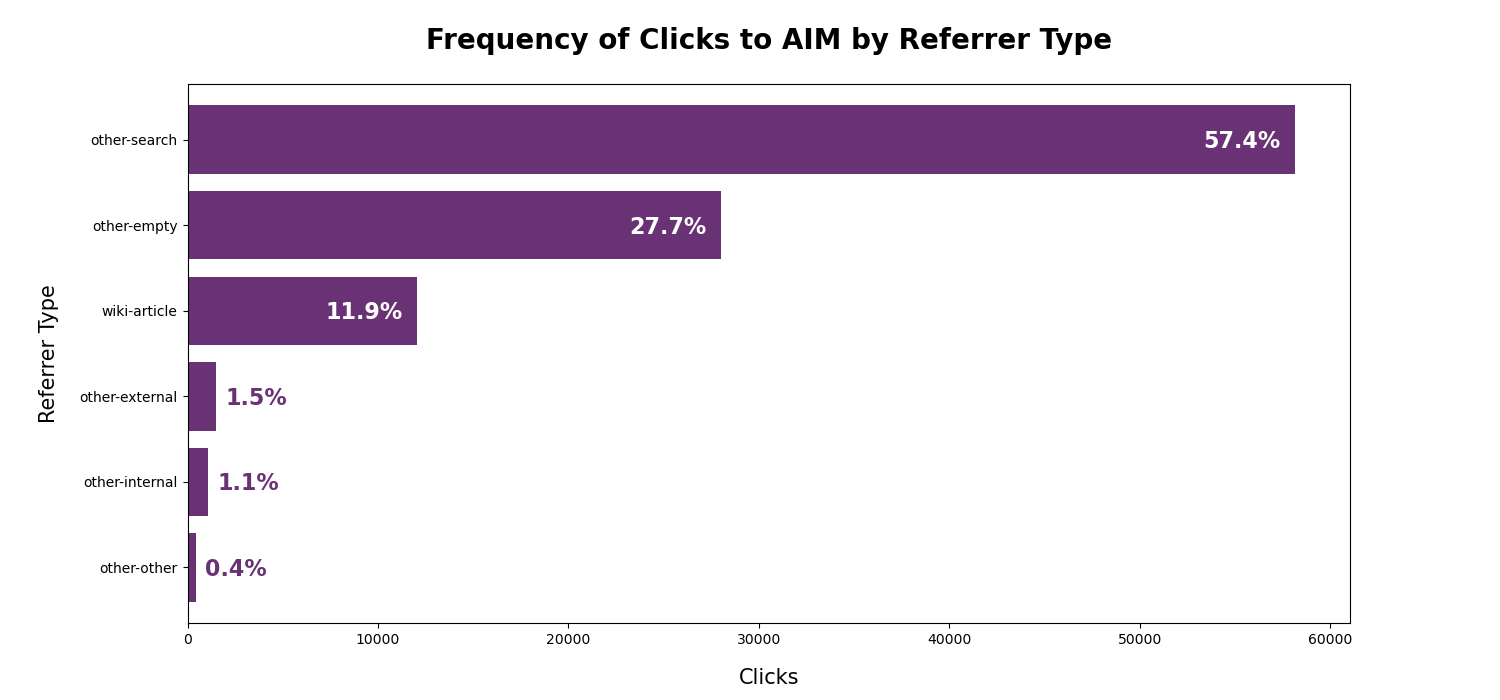

In [11]:
ex_list = ['other-empty', 'other-search', 'other-external',
           'other-internal', 'other-other']

to_aim_mapped = to_aim.copy()
to_aim_mapped['prev'] = (
    to_aim_mapped['prev']
    .apply(lambda x: x if x in ex_list else 'wiki-article')
)

to_aim_counts = (
    to_aim_mapped
    .groupby('prev')['n']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .iloc[::-1]
)

values = to_aim_counts.values
total = values.sum()
percentages = [(val / total) * 100 for val in values]

plt.figure(figsize=(15, 7))
ax = to_aim_counts.plot.barh(1, color='#693275', width=0.8)
plt.xlabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Referrer Type", labelpad=15, fontsize='15', fontweight='normal')
plt.title("Frequency of Clicks to AIM by Referrer Type",
          fontsize='20',
          fontweight='bold',
          pad=25)
y = -0.1
for val, pctg in zip(values, percentages):
    if pctg > 10:
        ax.text(val - 4800,
                y,
                f'{pctg:.1f}%',
                fontweight='bold',
                fontsize=16,
                color='white')
    else:
        ax.text(val + 500,
                y,
                f'{pctg:.1f}%',
                fontweight='bold',
                fontsize=16,
                color='#693275')
    y += 1
plot_to_html('Frequency of Clicks to AIM by Referrer Type')

<center><b>Figure 5.</b> Frequency Distribution of Clicks to AIM by Referrer Type</center>  
<br>
Upon inspecting the types of referral link that generated clicks to the AIM page, we are able to plot the results as shown in <b>Figure 5</b>. The majority of the clicks generated were from search engine results.
<br><br>
The high proportion of empty referrals might be perplexing, but upon deeper investigation, it seems that
empty referrals are caused by issues such as specific browsers not returning a referral, transferring to a mobile app, and other similar occurences. For this case it would be logical to assume empty referrals simply as direct hits, or a user accessing
the wikipedia page of AIM directly from an external source. 
<br><br>
The 11.9% of users who viewed AIM's wikipedia page coming from another wikipedia article is what this study can explore the most. Amounting to roughly 12,000 clicks since the page's creation, we can explore further how these clicks came about and from which articles the clicks come from.
<br>
<br>


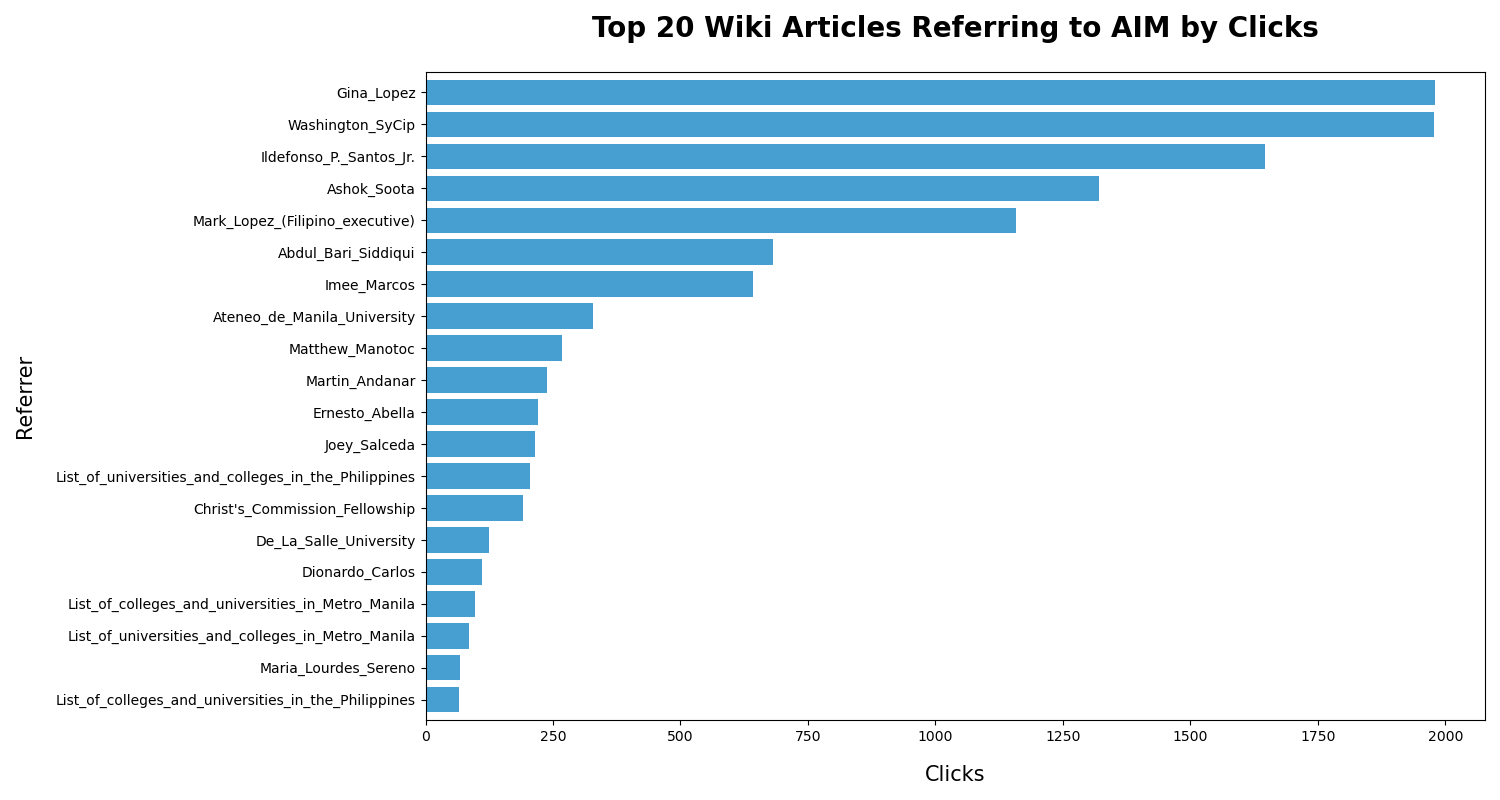

In [12]:
to_aim_counts = (
    to_aim[~to_aim.prev.str.contains('other-')]
    .groupby('prev')['n']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .iloc[::-1]
)

to_aim_counts.plot(
    kind="barh",
    color='#479FD1',
    figsize=(15, 8),
    width=0.8
)

plt.title('Top 20 Wiki Articles Referring to AIM by Clicks',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Referrer", labelpad=15, fontsize='15', fontweight='normal')
plt.tight_layout()
plot_to_html('Top 20 Wiki Articles Referring to AIM by Clicks')

<center><b>Figure 6.</b> Number of Clickstream Traffic from the Top 20 Referring Wiki Articles</center>

We can visualize where the majority of the internal traffic is coming from by showing the click count per referring article. As seen in **Figure 6**, we can determine the top referring pages, with the article on Gina_Lopez being the top source of traffic, closely followed by the article on Washington_SyCip. Some other notable insights that can be taken from the **Figure 6** are:
- Thirteen (13) out of the top 20 referring articles are personalities with some affiliation with AIM.
- Four (4) are listing articles (list of schools)
- Ateneo de Manila and De La Salle University, two of the Big Four universities also provide significant traffic to the AIM page.


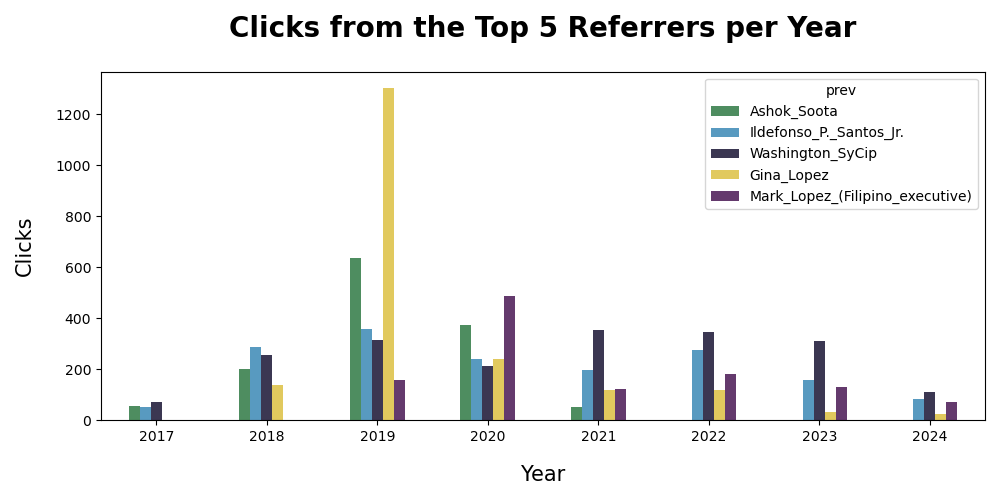

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot((to_aim[(to_aim.prev == 'Washington_SyCip') |
                    (to_aim.prev == 'Gina_Lopez') |
                    (to_aim.prev == 'Ildefonso_P._Santos_Jr.') |
                    (to_aim.prev == 'Ashok_Soota') |
                    (to_aim.prev == 'Mark_Lopez_(Filipino_executive)')]
             .groupby(['prev', 'year'])['n']
             .sum()
             .reset_index()),
            x='year',
            y='n',
            hue='prev',
            palette={'Washington_SyCip': '#383356',
                     'Gina_Lopez': '#F7D748',
                     'Ildefonso_P._Santos_Jr.': '#479FD1',
                     'Ashok_Soota': '#43975B',
                     'Mark_Lopez_(Filipino_executive)': '#693275'},
            width=0.5)
plt.title('Clicks from the Top 5 Referrers per Year',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Year", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.tight_layout()
plot_to_html('Clicks from the Top 5 Referrers per Year')

<center><b>Figure 7.</b> Number of Clickstream from Top 5 Referrers from 2017 - 2024</center>

**Figure 7** gives us a deeper understanding of the reason why some links experience a suddeng increase in clickstream traffic. By looking into how much each article directs trafffic to AIM's page throughout the years, we can understand more the pertinent reasons why they generated traffic:  
- **Ashok Soota:** (AIM Alumnus - MBM 1973) Tech Tychoon and Philantropist. Traffic from his page declined because his article is now non existent from Wikipedia.
- **Ildefonso P. Santos:** National Artist for Architecture linked to AIM because of his landscape architecture work for AIM, generated consistent traffic through the years.
- **Washington Sycip:** The namesake of AIM's Business School: W. Sycip School of Business, well known for his legacy in the accounting profession, his page generates constistent traffic.
- **Gina Lopez:** (AIM MDM Alumnus) Environmentalist and former DENR acting secretary generated the most traffic overall, but was mostly concentrated during the year of her passing in 2019, traffic eventually faded after that year.
- **Mark Lopez:** (AIM EMBA Alumnus) ABS-CBN Executive generated majority of his article's traffic on 2020, the year ABS-CBN lost its franchise.


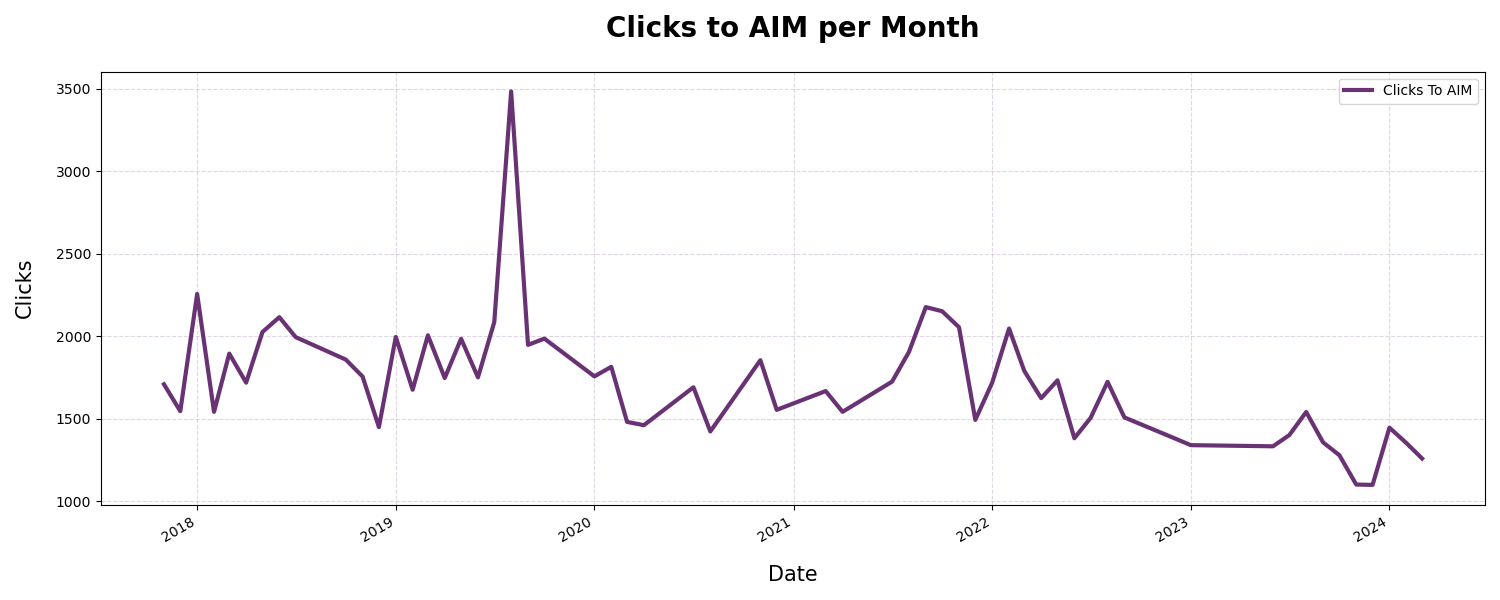

In [14]:
to_aim_per_month = to_aim.groupby('date')['n'].sum()
from_aim_per_month = from_aim.groupby('date')['n'].sum()

plt.figure(figsize=(15, 6))
to_aim_per_month.plot(
    kind='line',
    linewidth=3,
    color='#693275',
    label='Clicks To AIM'
)

plt.title('Clicks to AIM per Month',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Date", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.grid(axis='x', linestyle='--', color='#693275', alpha=0.2)
plt.grid(axis='y', linestyle='--', color='#693275', alpha=0.2)
plt.legend()
plt.tight_layout()
plot_to_html('Clicks to AIM per Month')

<center><b>Figure 8.</b> Monthly Total Clicks to AIM Page from 2017 - 2024</center>

From the time series plot on **Figure 8**, we see an apparent spike in viewership on August 2019. **Figure 9** looks into this unusual event and as expected based on the previous results, it was actually viewership caused by Gina Lopez's passing.  

Generally it could be surmised that the general trend for AIM's Wikipedia viewership is on a decline. The average clickstream usually stays above 1,500, but in 2023 onwards it is falling below 1,500 clicks per month.


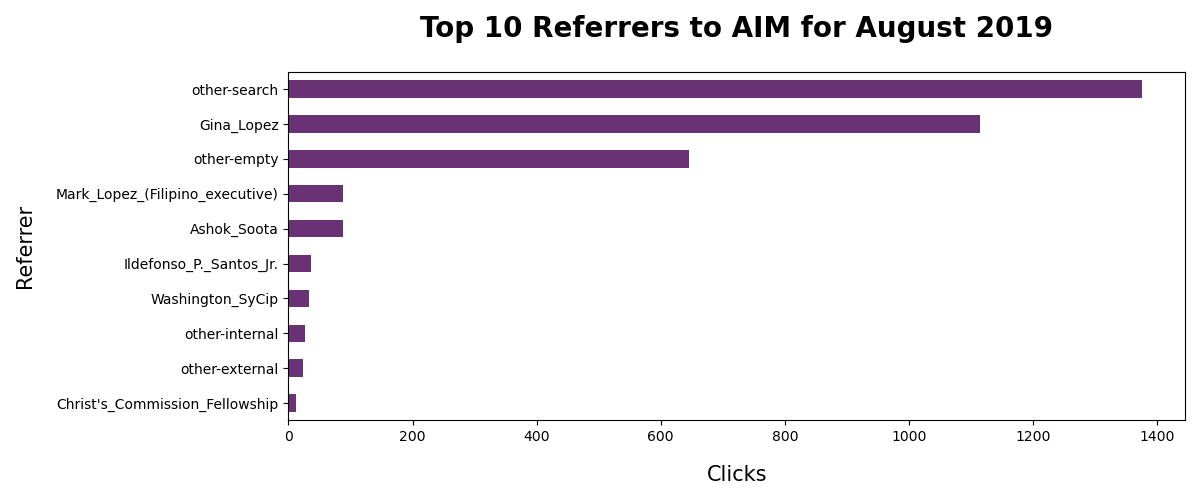

In [15]:
to_aim_201908 = to_aim[to_aim['date'] == '2019-08-01'] \
    .groupby('prev')['n'].sum() \
    .sort_values(ascending=False) \
    .head(10) \
    .iloc[::-1]

plt.figure(figsize=(12, 5))
to_aim_201908.plot(kind='barh', color='#693275')

plt.title('Top 10 Referrers to AIM for August 2019',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Referrer", labelpad=15, fontsize='15', fontweight='normal')
plt.tight_layout()
plot_to_html('Top 10 Referrers to AIM for August 2019')

<center><b>Figure 9.</b> Number of Clicks of Top 10 Referring Pages for the Month of August 2019</center>

## Outgoing Traffic

Looking into outgoing traffic from AIM's Wikipedia page can also be advantageous to AIM. Investigating outgoing traffic can give insights on visitor behavior, as it can signify which part of AIM's article pique their interest.


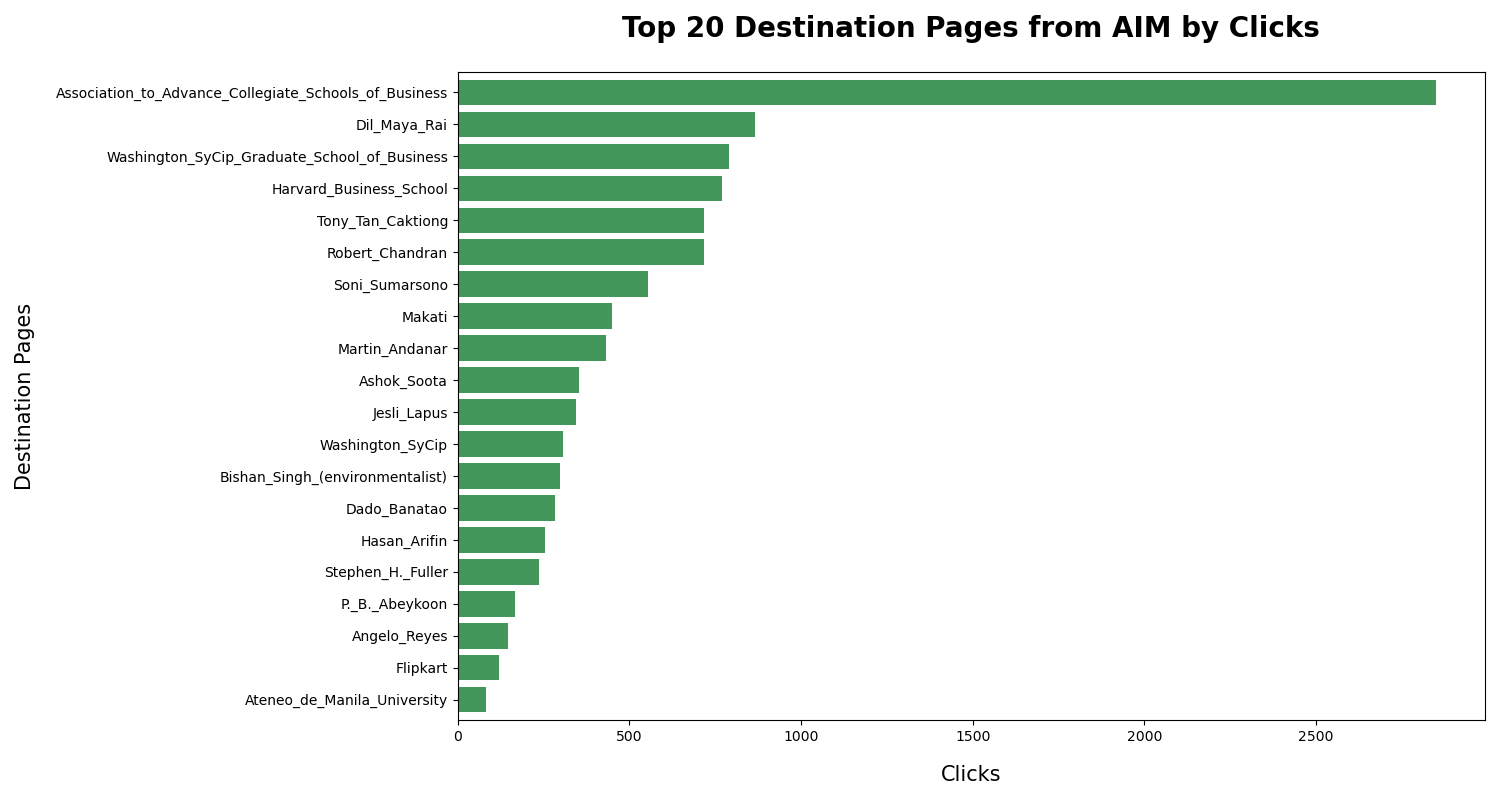

In [16]:
from_aim_counts = (
    from_aim.groupby('curr')['n']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .iloc[::-1]
)

from_aim_counts.plot(
    kind="barh",
    color='#43975B',
    figsize=(15, 8),
    width=0.8
)


plt.title('Top 20 Destination Pages from AIM by Clicks',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Destination Pages", labelpad=15, fontsize='15',
           fontweight='normal')
plt.tight_layout()
plot_to_html('Top 20 Destination Pages from AIM by Clicks')

<center><b>Figure 10.</b> Number of Clicks from Top 20 Referrers</center>

The bar plot shown in **Figure 10** highights some significant points for exploration:
- **Association to Advance Collegiate Shools of Business (AACSB)** - A lot of visitors seem to be interested in the AACSB article after looking into AIM. This could imply that most visitors are looking to read more of the accreditation body associated to AIM.
- **Dil Maya Rai** - She generated significant traffic, possibly because she is first in the list of Notable Alumni.
- **Washington Sycip Graduate School of Business** - The school generated the 3rd most traffic, which could imply that most visitors are interested in AIM's Business Courses.
- **Alumni** - Twelve (12) of the 20 listed were redirected to personalities listed under AIM's notable alumni page.


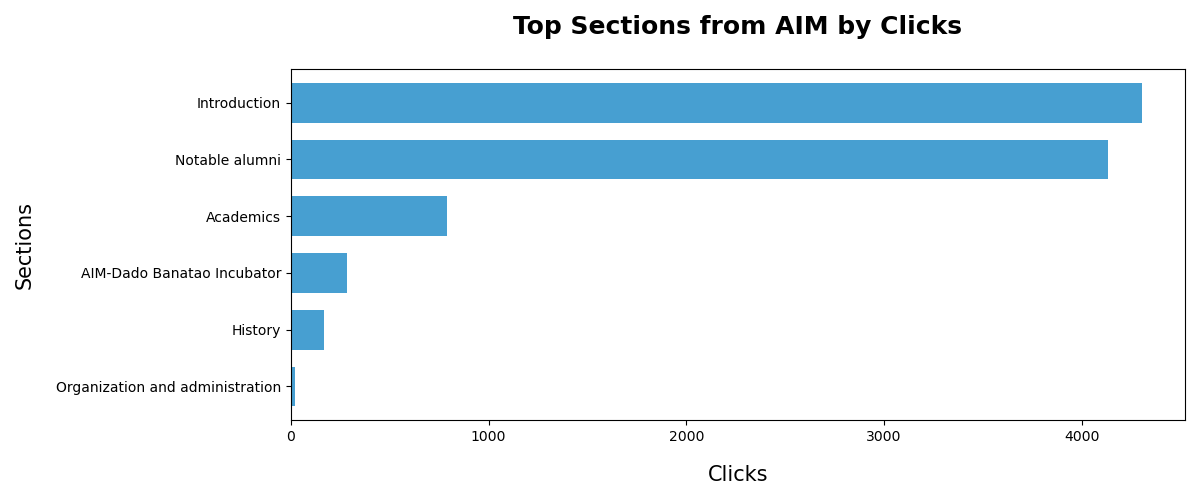

In [17]:
section_counts = clicks_df.groupby('curr_section')['n'].sum() \
    .sort_values(ascending=False) \
    .iloc[::-1]

section_counts.plot(kind='barh', color='#479FD1', figsize=(12, 5), width=0.7)


plt.title('Top Sections from AIM by Clicks',
          fontsize='18',
          fontweight='bold',
          pad=25)
plt.xlabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Sections", labelpad=15, fontsize='15', fontweight='normal')
plt.tight_layout()
plot_to_html('Top Sections from AIM by Clicks')

<center><b>Figure 11.</b> Bar Plot of Number of Clicks on Links per Section</center>

Links in the wikipedia page of AIM, are scattered throughout sections. Looking at where the links are located tells us on which section visitors might actually be interested in, assuming that the section has links. **Figure 11** shows the distribution of clicks per section, and at the top is the Introduction section, followed by the Notable Alumni section. We can look into this further on which links on each section piques the interest of the page visitor.


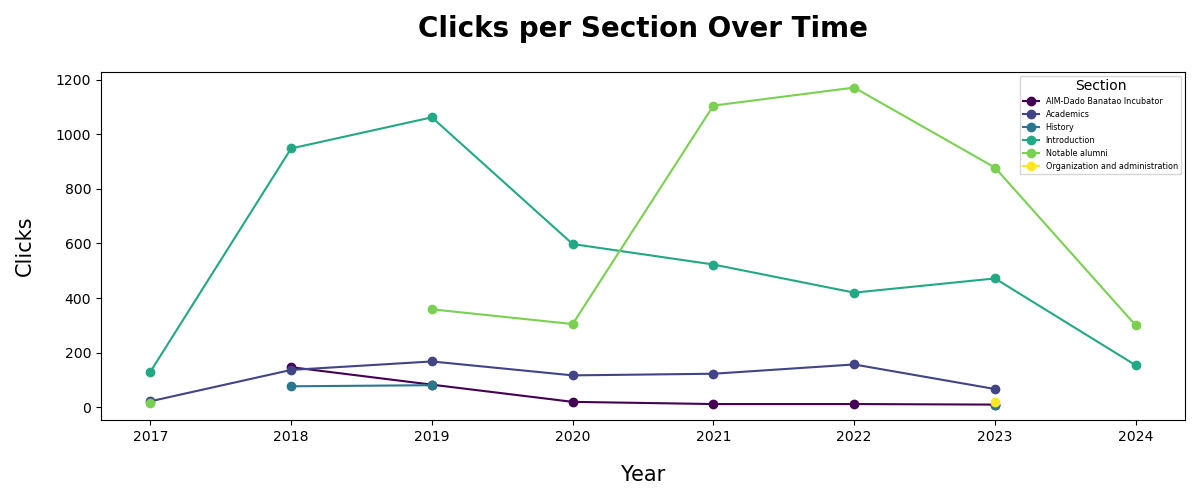

In [18]:
section_filled = clicks_df.dropna(subset=['curr_section'])
section_by_year = section_filled \
    .groupby(['year', 'curr_section'])['n'].sum() \
    .reset_index()

section_pivot = section_by_year.pivot_table(
    index=['year'],
    columns='curr_section',
    values='n',
    aggfunc='sum'
)

section_pivot.plot(kind='line',
                   marker='o',
                   colormap='viridis',
                   figsize=(12, 5))
plt.title('Clicks per Section Over Time',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Year", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.legend(title='Section', loc='upper right', fontsize='xx-small')
plt.tight_layout()
plot_to_html('Clicks per Section Over Time')

<center><b>Figure 12.</b> Number of Clicks per Section from 2017 to 2024</center>

Exploring the number of clicks per section through the years in **Figure 12** reveal sudden spikes in clicks for particular sections. 
Particularly, the Introduction and Notable Alumni sections generate comparable interest at different times.


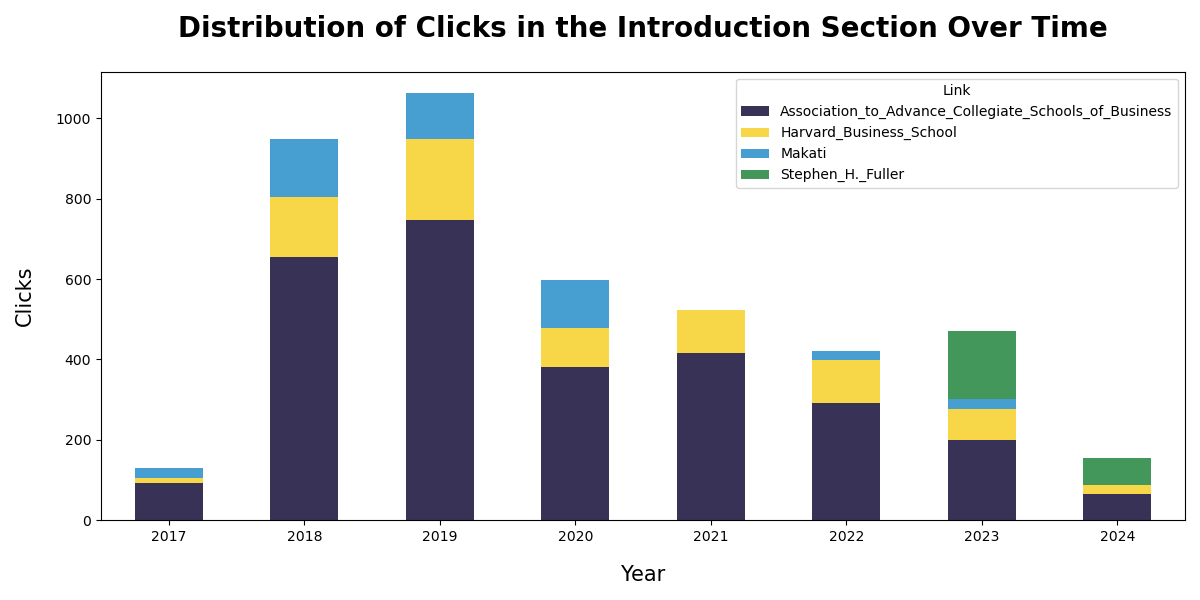

In [19]:
aim_colors = ['#383356', '#F7D748', '#479FD1', '#43975B', '#693275']

intro_yearly_clicks = clicks_df[clicks_df['curr_section'] == 'Introduction'] \
    .groupby(['year', 'curr'])['n'].sum()

intro_stacked = intro_yearly_clicks.unstack()

intro_stacked.plot(kind='bar',
                   stacked=True,
                   color=aim_colors,
                   figsize=(12, 6))
plt.title('Distribution of Clicks in the Introduction Section Over Time',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Year", labelpad=15, fontsize='15', fontweight='normal')
plt.ylabel("Clicks", labelpad=15, fontsize='15', fontweight='normal')
plt.xticks(rotation=0)
plt.legend(title='Link', loc='upper right')
plt.tight_layout()
plot_to_html('Clicks on Introduction Section Links Over Time')

<center><b>Figure 13.</b> Number of Clicks on Links in the Introduction Section from 2017 to 2024</center>

**Figure 13** highlights the interest generated by the accreditation bestowed upon by AACSB, visitors might be curious as to how significant the accreditation is. Potential students might be the ones checking out AACSB's article to learn more about the accreditation.


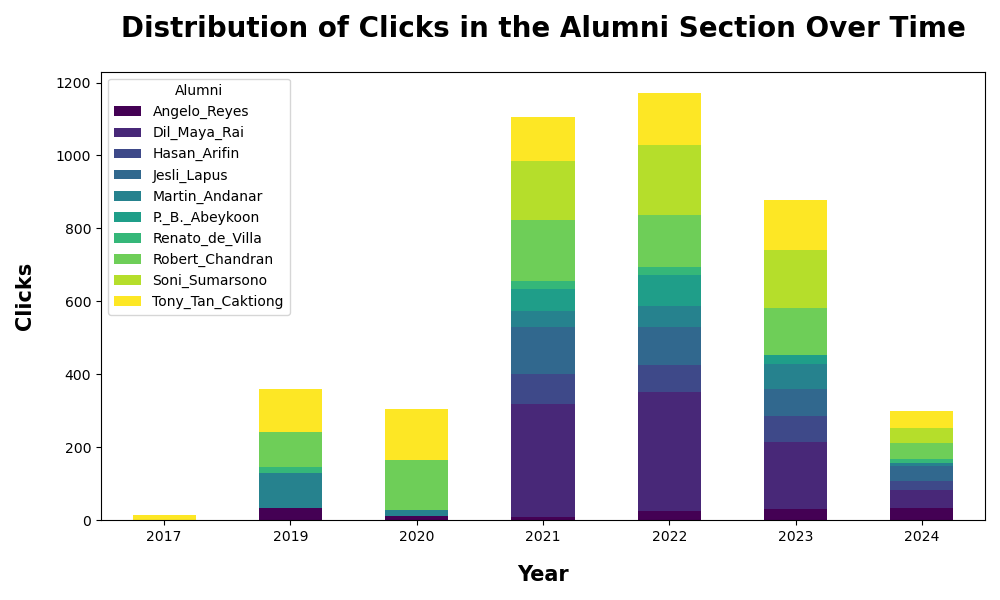

In [22]:
alumni_yearly_clicks = (
    clicks_df[clicks_df['curr_section']=='Notable alumni']
    .groupby(['year', 'curr'])['n']
    .sum()
)

alumni_stacked = alumni_yearly_clicks.unstack()

alumni_stacked.plot(kind='bar',
                    stacked=True,
                    colormap='viridis',
                    figsize=(10, 6))
plt.title('Distribution of Clicks in the Alumni Section Over Time',
          fontsize='20',
          fontweight='bold',
          pad=25)
plt.xlabel("Year", labelpad=15, fontsize='15', fontweight='bold')
plt.ylabel("Clicks", labelpad=15, fontsize='15', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Alumni', loc='upper left')
plt.tight_layout()
plot_to_html('Distribution of Clicks in the Alumni Section Over Time')

<center><b>Figure 14.</b> Number of Clicks on Links in the Alumni Section from 2017 to 2024</center>

**Figure 14** breaks down the clicks on the Notable Alumni section. It shows which links generate interest in the section at certain points in time. Some of the insights include:
- **Dil Maya Rai:** (Master in Development Management) - generated a lot of interest ever since the link was added on 2021 but is gradually decreasing.
- **Tony Tan Caktiong:** (Top Management Program-1983) - Jolibee Founder and CEO, gathers consistent traffic from AIM page. He is a household name in the Filipino Business Community.
- **Martin Andanar:** (Master in Entrepreneurship-2007) - gained traffic during his stint under Rodrigo Duterte's Cabinet as Presidential Communications Operations Office Secretary.
- **Soni Sumarsono:** (Master in Development Management) - a prominent Indonesian civil servant, attracts consistent traffic from AIM page ever since its inclusion in the notable alumni section.
- **Robert Chandran:** (Master in Business Management) - Singapore based founder and CEO of Chemoil, also gains consistent traffic from AIM.

<div class="custom-header">
    <h1 class="small-caps"><a name='results'>Results and Discussion</a></h1>
</div>

#### Traffic from Search Results

The majority of traffic (57.4%), to the AIM page came from search results. This suggests that a notable portion of visitors are actively seeking AIM or its related keywords, highlighting the importance of search engine optimization (SEO) and maintaining a strong online presence. SEO is a long-term strategy that helps attract organic traffic and boosts brand recognition requiring less investment over time.

#### Clickstream Traffic from Affiliated Personalities

The exploratory data analysis shows a noteworthy trend: a considerable portion of traffic comes from individuals associated with AIM. These individuals' prominence and engagement with the media play a significant role in driving traffic to the platform. This can be attributed to various factors, including:

- Coverage of significant events related to these personalities, such as the passing of Gina Lopez.
- Involvement in recent public controversies, such as the ABS-CBN franchise issue in the case of Mark Lopez
- Ongoing media exposure, as seen with Martin Andanar's role as PCOO Secretary.
- Legacy prominence of individuals, including National Artists, prominent business figures, and individuals widely recognized in their respective fields.

#### Clicks from Other Institutions

The EDA also revealed clickstream traffic from other institutions, such as universities. While the volume of clicks from these sources may be lower compared to those generated by personalities, they hold potential value. Users navigating from these institutions may already be engaged in exploring educational opportunities, indicating a potential interest in AIM. Additionally, Christ's Commission Fellowship (CCF) also generated significant traffic, having historical ties to AIM, and having hosted their first service there.

#### Interest in Association to Advance Collegiate Schools of Business (AACSB)

The amount of clicks AACSB's got through AIM was disporportionately high compared to other links. Getting almost 3,000 clicks, the runner up link, Dil Maya Rai,
does not even come close at around 900 clicks. The way AIM's article mentions AACSB could have contributed to the amount of clicks, add the fact that the AACSB is mentioned
in the introduction section, specifically in the second sentence of the article. 

#### Clicks Generated by Notable Alumni

Upon analyzing the clicks originating from the AIM page, it becomes apparent that the Notable Alumni section significantly contributes to the overall outgoing traffic. This underscores the value of showcasing accomplished alumni and their achievements to enhance the institution's visibility and brand recognition. By spotlighting successful graduates, AIM not only reinforces its reputation for quality education but also attracts interest from external audiences, reinforcing its overall appeal and influence.

<div class="custom-header">
    <h1 class="small-caps"><a name='conclusion'>Conclusion</a></h1>
</div>

The results and insights data exploration provided can help us create tailored recommendations on what AIM should do to augment their digital presence. Here are possible ways that AIM can increase traffic to their page:

#### Embed AIM links to affiliated personalities

As we have observed a substantial amount of traffic from affiliated personalities, ensuring that the pages of individuals affiliated with AIM include a backlink to AIM's page would be a low-hanging fruit. Such examples include the following:

- **Tony Tan Caktiong**  
A Top Management Program (TMP) alumnus and Jolibee founder$^{[9]}$, Tony Tan Caktiong's page recieves a lot of traffic from AIM's page. His page however, lacks any details pertaining to his enrollment in the program through AIM. A backlink from Tony Tan Caktiong's page could generate considerable traffic, specially since he is a houshold name in
the Philippine business sector.


- **Philip Juico**  
Master of Business Management (MBM 1973) alumnus Philip Juico held cabinet positions in the Philippine government. His most recent exposure arose during his tenure as president of the Philippine Athletics Track and Field Association (PATAFA), particularly concerning his extensively covered disagreement with pole vaulter EJ Obiena$^{[10]}$.  

- **Dr. Andrew L. Tan**  
Dr. Andrew L. Tan is a business magnate and the founder of the conglomerate Alliance Global, Inc., which includes Emperador Distilleries, Golden Arches, and Megaworld, among others. Additionally, Dr. Andrew Tan contributes financially to the Dr. Andrew L. Tan Center for Tourism$^{[11]}$. Mentioning this relationship with AIM could benefit both
pages, increasing the traffic for both by adding backlinks.

#### Link Institutions to AIM

Affiliating AIM with established institutions can provide a level of trust depending on the affiliated organization. Organization can include schools, companies,
foundations, startups. A good example of this would be:

- **Aboitiz Group**  
Aboitiz Group through its foundation made a sizable donation to AIM to fund the Aboitiz School of Innovation, Technology, and Entrepreneurship$^{[12]}$. This can be easily added to the Aboitiz Group wikipedia page to provide a backlink to AIM, which could contribute some amount of traffic.

#### Create new Wikipedia pages for affiliated personalities

There are a lot of more personalities who could generate traffic for AIM, however most of them do not have Wikipedia pages themselves. One good way to capture that is to initiate the creation of the page itself. This could be beneficial specially for people who have decent exposure but don't have their own page. A couple of examples are:

- **Ashok Soota**  
An overlooked opportunity, Ashok Soota previously attracted consistent traffic before his Wikipedia page was removed. As a well-known veteran in the tech industry, it's reasonable to assume that he would have continued to generate traffic. However, the opportunity was missed when he was recognized by Forbes Asia as one of Asia's 2022 Heroes of Philanthropy, as his article had already been removed by that time$^{[13]}$.

- **Dr. Erramon I. Aboitiz**  
Erramon Aboitiz, currently a member of AIM's board and serving as its chairman and Director of Aboitiz Equity Ventures, is a notable figure in the Philippines' business sector. If he had a Wikipedia page highlighting his roles and contributions, including his donations to AIM, it could potentially drive traffic and enhance brand recognition for the institution.$^{[14]}$

#### Content Recommendations

Analyzing the outgoing clicks could give us a hypothetical overview of the page visitor's interest and behavior. We already observed that a lot of interest revolves
around notable alumnus and huge interest in AACSB. Some of the recommendations regarding content are:

- **Maximize the Alumni Section**  
Visitors of the page are interested in notable alumnus, it is advisable to optimize the available space in that section to incorporate additional prominent individuals.
The Wikipedia page titled <i>"Category:Asian Institute of Management alumni"</i> comprises of 42 alumni, each of whom possesses their individual Wikipedia pages. However, the alumni section of AIM comprises only of 11 distinguished alumni. An easy addition we recommend would be **Eugene Acevedo**, an MBA alumnus. A banking veteran with over thirty years in the industry and currently the president and CEO of one of Philippines' largest banks, RCBC. Additionally, Mr. Acevedo is also part og AIM's Board of Trustees$^{[15]}$. He would be a good addition since he has a great following in LinkedIn and his Wikipedia page had a total of 412 pageviews for the April 2024$^{[16]}$.

- **Diversity Counts**  
Clicks to the distinguished alumni section increased substantially in late 2020, following the additions of Dil Maya Rai and Soni Sumarsono. By emphasizing its international alumni, AIM can promote itself as an internationally renowned institution and potentially draw visitors from the alumni's country of origin. For example, the inclusion of **Euh Yoon-dae**, a distinguished scholar in South Korea and a consultant to the government of South Korea$^{[17]}$, could enhance the diversity of AIM's alumni body and attract attention from the nation of South Korea.

- **Expanding its Business Reputation**  
The majority of links that generate traffic to AIM's page is associated with its Business School, reflecting the institution's primary focus on business education. This trend aligns with the substantial number of graduates from AIM's MBM or MDM programs. Conversely, other schools within AIM, like ASITE, the technology and innovation arm, attract comparatively lower traffic. AIM's introduction of newer programs signals its commitment to adapting to dynamic business practices. Consequently, there's potential to spotlight other schools within AIM, such as ASITE, to demonstrate the institution's versatility and credibility in offering cutting-edge technology and business education.

#### Wikipedia's Editing Policy

The suggestions outlined in this study would only be applicable if the proposed modifications to the Wikipedia articles were implemented and authorized. Wikipedia has a set of regulations in place to uphold its integrity as a reliable source of information. The majority of the content must be substantiated by external reputable references, and the creation of pages should be justified by a specific need or necessity for the page. This serves as a reminder that although Wikipedia is an open repository, there are still criteria for determining what content is published on its pages.

<div class="custom-header">
    <h1 class="small-caps"><a name='recommendations'>Recommendations</a></h1>
</div>

This project mainly utilizes Wikipedia clickstream data and web scraping AIM's Wikipedia page. This acts as the limitation of the study and there are many more facets and
extensions of this study that other can explore such as:

- **Digital Marketing Metrics**  
This study is limited to its dataset which only explores clickstream or clicks data. Various digital marketing metrics such as views, and engagement can also be explored to give a more in-depth analysis of the online presence of AIM. Furthermore, other platforms such as social media or websites holds different success metrics and it is important to appropriate the metrics to the institutions goals on those platforms.

- **External Traffic**  
This study primarily investigated the clickstream data associated with navigating to and from other Wikipedia articles. However, around 80% of the clicks originate from external sources. There may be valuable information contained in those clicks, but the Wikipedia clickstream data can only categorize them as "other-search," preventing us from analyzing the specific sources of external traffic. Investigating the origins would be a valuable expansion of this project.  

- **Markov Chain Analysis**  
Only a single sequence of requests was analyzed for this study. A more intricate approach would involve analyzing the click pathways and probabilities. By analyzing additional sequences of clicks, a deeper understanding of the origins of traffic can be derived.

<div class="custom-header">
    <h1 class="small-caps"><a name='references'>References</a></h1>
</div>

1. The Asian Institute of Management: At the Heart of an Ever-Changing Asia. (n.d.). Retrieved from https://aim.edu/about-us

2. Wikipedia. (2024, May 10). In *Wikipedia*. Retrieved from https://en.wikipedia.org/wiki/Wikipedia

3. Beyond Business: AIM Kicks off 50th Anniversary Celebrations with a Logo Launch and Press Conference - AIM Leader. (2019, July 30). AIM Leader. Retrieved from https://aimleader.aim.edu/aim-news/beyond-business-aim-kicks-off-50th-anniversary-celebrations-with-a-logo-launch-and-press-conference/

4. AIM Launches Its MSc in Financial Technology Program in Partnership with the UK-based Manchester Metropolitan University. (2024, February 14). Retrieved from https://aim.edu/news/aim-launches-its-msc-financial-technology-program-partnership-uk-based-manchester-metropolitan

5. AIM launches Master in International Business Law program | Inquirer Business. (2023, September 13). INQUIRER.net. Retrieved from https://business.inquirer.net/420861/aim-launches-master-in-international-business-law-program

6. First Double Undergraduate Degrees offered by AIM and UH - AIM Leader. (2022, November 22). AIM Leader. Retrieved from https://aimleader.aim.edu/aim-news/first-double-undergraduate-degrees-offered-by-aim-and-uh/

7. Analytics: Clickstream. (n.d.). Retrieved from https://dumps.wikimedia.org/other/clickstream/readme.html

8. Research: Wikipedia clickstream. (2024, February 1). In *WikiMedia*. Retrieved from https://meta.wikimedia.org/wiki/Research:Wikipedia_clickstream

9. Tony Tan Caktiong. (2024, March 30). In *Wikipedia*. Retrieved from https://en.wikipedia.org/wiki/Tony_Tan_Caktiong

10. Philip Juico. (2023, September 16). In *Wikipedia*. Retrieved from https://en.wikipedia.org/wiki/Philip_Juico

11. Dr. Andrew L. Tan: The "New Kid" Done Good (n.d.). Retrieved from https://aim.edu/research-centers/dr-andrew-l-tan-center-tourism/about-benefactor

12. Aboitiz donates over half a billion for new innovation school at AIM. (n.d.). Retrieved from https://aboitiz.com/aboitiz-donates-over-half-a-billion-for-new-innovation-school-at-aim/

13. Forbes Asia named Ashok Soota, MBM ’73, as one of Asia’s 2022 Heroes of Philanthropy. (2022, December 12). AIM Leader. Retrieved from https://aimleader.aim.edu/alumni-news/forbes-asia-named-ashok-soota-mbm-73-as-one-of-asias-2022-heroes-of-philanthropy/

14. Asian Institute of Management appoints Erramon Aboitiz as the new Chairman. (n.d.). Retrieved from https://aboitiz.com/asian-institute-of-management-appoints-erramon-aboitiz-as-the-new-chairman/

15. Eugene S. Acevedo: Executive in Residence. (n.d.). Retrieved from https://aim.edu/faculty-and-staff/executives-residence/eugene-s-acevedo

16. Eugene_Acevedo. (2024, January 28). In *Wikipedia*. Retrieved from https://en.wikipedia.org/wiki/Asian_Institute_of_Management. Pageview analysis retrieved from Wikipedia Pageviews Analysis tool: https://pageviews.wmcloud.org/ (accessed on May 11, 2024).

17. Euh Yoon-dae. (2024, March 18). In *Wikipedia*. Retrieved from https://en.wikipedia.org/wiki/Euh_Yoon-dae


#### Disclosure

This paper was created with the assistance of LLM tools such as ChatGPT and QuillBot. The use of these tools are limited to improving the grammar and the flow of the writeups. The tools were also used as a querying tool when looking for specific functions and syntax during the development of the code.